In [78]:
#Importing the important libraries i need
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from time import time

In [79]:
df = pd.read_csv("research.csv")

In [80]:
df.shape

(1028, 13)

In [81]:
df.head()

,Gender,Department,YOA,JAMB Maths Score,JAMB Score,OlevelMathsGrade,MAT101Grade,Were you given any form of assistance during your OLevel Mathematics examination?,Were you given any form of assistance during your JAMB examination?,Did you sat for your OLevel Mathematics examination yourself?,YOOE,YOJE,SOO
0,Male,Computer,2018,55,209,A,A,No,No,Yes,2016,2018,Edo
1,Female,Building,2016,40,198,B,B,No,No,Yes,2015,2016,Kebbi
2,Female,Mathematics,2019,38,176,B,B,No,No,Yes,2018,2019,Anambra
3,Male,Mathematics,2017,39,179,B,B,No,No,Yes,2016,2017,Kwara
4,Female,Statistics,2016,40,180,B,C,No,No,No,2016,2016,Kaduna


In [82]:
#Exploring the dataset to get some statistical information
df.describe()

,YOA,JAMB Maths Score,JAMB Score,YOOE,YOJE
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,2017.569066,44.987354,192.704280,2013.242218,2017.544747
std,1.611212,15.629997,101.662213,80.037654,71.723456
min,2007.000000,0.000000,0.000000,202.000000,206.000000
25%,2016.750000,40.000000,180.000000,2016.000000,2016.000000
50%,2018.000000,45.000000,188.000000,2017.000000,2017.000000
75%,2019.000000,49.000000,198.000000,2018.000000,2019.000000
max,2022.000000,245.000000,2019.000000,2027.000000,3017.000000


In [83]:
#Converting dataset to categorical
df["YOA"]=df["YOA"].astype("category")
df["Gender"]=df["Gender"].astype("category")
df["JAMB Maths Score"]=df["JAMB Maths Score"].astype("category")
df["JAMB Score"]=df["JAMB Score"].astype("category")
df["OlevelMathsGrade"]=df["OlevelMathsGrade"].astype("category")
df["MAT101Grade"]=df["MAT101Grade"].astype("category")
df["Were you given any form of assistance during your JAMB examination?"]=df["Were you given any form of assistance during your JAMB examination?"].astype("category")
df["Were you given any form of assistance during your OLevel Mathematics examination?"]=df["Were you given any form of assistance during your OLevel Mathematics examination?"].astype("category")
df["Did you sat for your OLevel Mathematics examination yourself?"]=df["Did you sat for your OLevel Mathematics examination yourself?"].astype("category")
df["YOOE"]=df["YOOE"].astype("category")
df["YOJE"]=df["YOJE"].astype("category")
df["SOO"]=df["SOO"].astype("category")
df["Department "]=df["Department "].astype("category")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 13 columns):
 #   Column                                                                             Non-Null Count  Dtype   
---  ------                                                                             --------------  -----   
 0   Gender                                                                             1028 non-null   category
 1   Department                                                                         1028 non-null   category
 2   YOA                                                                                1028 non-null   category
 3   JAMB Maths Score                                                                   1028 non-null   category
 4   JAMB Score                                                                         1028 non-null   category
 5   OlevelMathsGrade                                                                   1028 non-null 

In [85]:
#Checking for null values in my dataset
df.isnull().sum()

Gender                                                                               0
Department                                                                           0
YOA                                                                                  0
JAMB Maths Score                                                                     0
JAMB Score                                                                           0
OlevelMathsGrade                                                                     0
MAT101Grade                                                                          0
Were you given any form of assistance during your OLevel Mathematics examination?    0
Were you given any form of assistance during your JAMB examination?                  0
Did you sat for your OLevel Mathematics examination yourself?                        0
YOOE                                                                                 0
YOJE                                       

In [86]:
#Checking the performance of students in MAT101
df["MAT101Grade"].value_counts()

B    477
C    285
A    217
E     23
D     22
F      4
Name: MAT101Grade, dtype: int64

In [87]:
#here I dropped some unwanted columns which are not necessary in the dataset

df.drop(['YOA','YOJE','Were you given any form of assistance during your OLevel Mathematics examination?','Were you given any form of assistance during your JAMB examination?','Did you sat for your OLevel Mathematics examination yourself?','YOOE','SOO','Department ',], axis=1,inplace=True)

In [88]:
df.head()

,Gender,JAMB Maths Score,JAMB Score,OlevelMathsGrade,MAT101Grade
0,Male,55,209,A,A
1,Female,40,198,B,B
2,Female,38,176,B,B
3,Male,39,179,B,B
4,Female,40,180,B,C


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            1028 non-null   category
 1   JAMB Maths Score  1028 non-null   category
 2   JAMB Score        1028 non-null   category
 3   OlevelMathsGrade  1028 non-null   category
 4   MAT101Grade       1028 non-null   category
dtypes: category(5)
memory usage: 9.7 KB


In [90]:
LE = LabelEncoder() #creating an instance of label encoder

In [91]:
df.MAT101Grade = LE.fit_transform(df.MAT101Grade)

In [92]:
df.OlevelMathsGrade = LE.fit_transform(df.OlevelMathsGrade)

In [93]:
df.Gender = LE.fit_transform(df.Gender)

In [94]:
df.head()

,Gender,JAMB Maths Score,JAMB Score,OlevelMathsGrade,MAT101Grade
0,1,55,209,0,0
1,0,40,198,1,1
2,0,38,176,1,1
3,1,39,179,1,1
4,0,40,180,1,2


In [95]:
x = df.iloc[:,:-1] #This mean I want all the columns except the last one which is the target column 
y = df.iloc[:, -1]# This time I want the target variable which is the last column

In [96]:
x.shape

(1028, 4)

In [97]:
y.shape

(1028,)

In [98]:
#Splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=70)

In [99]:
y_train.shape

(925,)

In [100]:
#Making object of the Random Forest Classifier for my required hyper parameters
clf = RandomForestClassifier(criterion = "gini", #the values of gini purity lies between 0 and 1
                            max_depth = 8, #Maximum depth of the tree as it grow
                            min_samples_split = 10, #minimum number of samples required to split node and bracnh of the tree
                            random_state = 5)

In [101]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [102]:
#Looking at the important feature since we have so many independent variables
clf.feature_importances_

array([0.05998485, 0.39738365, 0.40814995, 0.13448156])

In [103]:
#looking at the importance of the variables from column view (in terms of percentage)
df.columns

Index(['Gender', 'JAMB Maths Score', 'JAMB Score', 'OlevelMathsGrade',
       'MAT101Grade'],
      dtype='object')

In [104]:
y_pred = clf.predict(x_test)

In [105]:
y_pred

array([1, 1, 1, 0, 1, 3, 1, 1, 2, 1, 0, 1, 3, 5, 1, 0, 1, 4, 1, 2, 2, 1,
       0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2])

In [106]:
#This means all the values on the diagonal are correcly classified while the ones off diagonal are misclassified
confusion_matrix(y_test, y_pred)

array([[12,  8,  0,  0,  0,  0],
       [ 3, 42,  0,  0,  0,  0],
       [ 1, 10, 20,  0,  0,  0],
       [ 0,  2,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [107]:
#Accuracy of the model
accuracy_score(y_test, y_pred)

0.7669902912621359

In [108]:
#Doing a cross validation in percentage
cross_val_score(clf, x_train, y_train, cv =10)

C:\Users\S. M. AUDU\Documents\conda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


array([0.64516129, 0.74193548, 0.77419355, 0.77419355, 0.77419355,
       0.80434783, 0.81521739, 0.73913043, 0.77173913, 0.73913043])

In [109]:
#Printing the classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        16
           1       0.93      0.68      0.79        62
           2       0.65      1.00      0.78        20
           3       0.60      1.00      0.75         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

    accuracy                           0.77       103
   macro avg       0.80      0.90      0.83       103
weighted avg       0.82      0.77      0.77       103



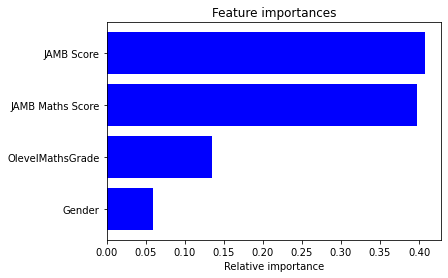

In [110]:
#Making a plot for feature importance of the model. This mean JAMB Maths Score is the most important feature in our
#classification model

features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [111]:
mean_squared_error(y_test, y_pred)

0.32038834951456313

In [112]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5660285765882878